In [1]:
# get the import we need(maybe)
import numpy as np
import time
import os, zipfile, shutil,gzip
import pandas as pd
import glob
from scipy.stats import linregress
import os
from datetime import datetime
from datetime import timedelta
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import warnings
import scipy
from numpy import polyfit, poly1d
from scipy import interpolate
import matplotlib as mpl
from scipy.signal import savgol_filter
from scipy.optimize import curve_fit
if not sys.warnoptions:
    warnings.simplefilter("ignore")
from sklearn.preprocessing import PolynomialFeatures
from collections import Counter
import collections

## data cleaning and feature engineering

In [2]:
#get_data

df_test=pd.read_csv(r'C:\Users\杜威\Desktop\机器学习\cell2cellholdout.csv')
df=pd.read_csv(r'C:\Users\杜威\Desktop\机器学习\cell2celltrain.csv')
df_all=df.append(df_test)

In [3]:
#the type of data

df_str_index=[]
for column in df.columns:
    if type(df[column][0])==str:
        df_str_index.append(column)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             50891 non-null  float64
 3   MonthlyMinutes             50891 non-null  float64
 4   TotalRecurringCharge       50891 non-null  float64
 5   DirectorAssistedCalls      50891 non-null  float64
 6   OverageMinutes             50891 non-null  float64
 7   RoamingCalls               50891 non-null  float64
 8   PercChangeMinutes          50680 non-null  float64
 9   PercChangeRevenues         50680 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  flo

In [4]:
#what is the str value like?

df[df_str_index]

,Churn,ServiceArea,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,...,HasCreditCard,NewCellphoneUser,NotNewCellphoneUser,OwnsMotorcycle,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,Yes,SEAPOR503,No,No,Yes,No,No,Known,Yes,Yes,...,Yes,No,No,No,30,Yes,1-Highest,Suburban,Professional,No
1,Yes,PITHOM412,Yes,No,No,No,No,Known,Yes,Yes,...,Yes,Yes,No,No,30,No,4-Medium,Suburban,Professional,Yes
2,No,MILMIL414,Yes,No,No,No,No,Unknown,No,No,...,Yes,Yes,No,No,Unknown,No,3-Good,Town,Crafts,Yes
3,No,PITHOM412,No,No,Yes,No,No,Known,Yes,Yes,...,Yes,Yes,No,No,10,No,4-Medium,Other,Other,No
4,Yes,OKCTUL918,No,No,No,No,No,Known,Yes,Yes,...,Yes,No,Yes,No,10,No,1-Highest,Other,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,Yes,LAXSFN818,No,Yes,Yes,No,No,Known,Yes,Yes,...,Yes,No,No,No,60,No,1-Highest,Suburban,Other,Yes
51043,No,LAXCDG310,Yes,No,Yes,No,No,Known,Yes,Yes,...,Yes,No,No,No,60,No,3-Good,Other,Other,No
51044,Yes,LAXCDG310,No,No,Yes,No,No,Known,No,No,...,Yes,No,No,No,80,No,5-Low,Other,Clerical,No
51045,No,NEVPOW619,Yes,No,Yes,No,No,Unknown,No,No,...,No,No,No,No,30,No,5-Low,Other,Other,No


In [5]:
#turn the str into int

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for name in df_str_index[:]:
    le.fit(df_all[name])
    df_all[name] = le.transform(df_all[name])
df_all[df_str_index]

,Churn,ServiceArea,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,...,HasCreditCard,NewCellphoneUser,NotNewCellphoneUser,OwnsMotorcycle,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,1,681,0,0,1,0,0,0,1,1,...,1,0,0,0,8,1,0,2,4,0
1,1,631,1,0,0,0,0,0,1,1,...,1,1,0,0,8,0,3,2,4,2
2,0,364,1,0,0,0,0,1,0,0,...,1,1,0,0,15,0,2,3,1,2
3,0,631,0,0,1,0,0,0,1,1,...,1,1,0,0,0,0,3,0,3,0
4,1,581,0,0,0,0,0,0,1,1,...,1,0,1,0,0,0,0,0,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2,328,0,0,1,0,0,1,0,0,...,1,0,0,0,10,0,0,0,3,1
19996,2,318,0,0,1,0,0,0,0,0,...,1,0,0,0,15,0,0,2,3,2
19997,2,300,0,0,1,0,0,1,0,0,...,1,1,0,0,15,0,0,2,3,0
19998,2,307,0,0,1,0,0,1,0,0,...,1,0,0,0,3,0,2,0,3,1


In [6]:
#turn the non into mean

for column in df_all.columns[2:]:
    df_all[column]=df_all[column].fillna(np.mean(df_all[column]))
df_all

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,1,24.000000,219.00000,22.000000,0.250000,0.00000,0.000000,-157.000000,-19.00000,...,0,4,0,0,8,1,0,2,4,0
1,3000010,1,16.990000,10.00000,17.000000,0.000000,0.00000,0.000000,-4.000000,0.00000,...,0,5,0,0,8,0,3,2,4,2
2,3000014,0,38.000000,8.00000,38.000000,0.000000,0.00000,0.000000,-2.000000,0.00000,...,0,6,0,0,15,0,2,3,1,2
3,3000022,0,82.280000,1312.00000,75.000000,1.240000,0.00000,0.000000,157.000000,8.10000,...,0,6,0,0,0,0,3,0,3,0
4,3000026,1,17.140000,0.00000,17.000000,0.000000,0.00000,0.000000,0.000000,-0.20000,...,0,9,0,1,0,0,0,0,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,3399938,2,85.150000,815.00000,88.000000,0.000000,1.00000,0.400000,0.000000,0.00000,...,0,0,0,0,10,0,0,0,3,1
19996,3399950,2,58.852853,525.72625,46.862899,0.894817,40.08773,1.222315,-10.845304,-1.20473,...,0,6,0,0,15,0,0,2,3,2
19997,3399966,2,58.852853,525.72625,46.862899,0.894817,40.08773,1.222315,-10.845304,-1.20473,...,0,8,0,1,15,0,0,2,3,0
19998,3399970,2,58.852853,525.72625,46.862899,0.894817,40.08773,1.222315,-10.845304,-1.20473,...,0,3,0,0,3,0,2,0,3,1


In [7]:
#split the df into train and test for research and get_Y_test

df_test=df_all.iloc[-20000:,:]
df_train=df_all.iloc[:-20000,:]

In [34]:
#get the Y_test

Y = np.array(df_all['Churn'])
X = np.array(df_all.iloc[:,2:])
X_train, X_test, Y_train= np.array(df_train.iloc[:,2:]),np.array(df_test.iloc[:,2:]),np.array(df_train['Churn'])

In [8]:
#data for research

from sklearn.model_selection import train_test_split
Y = np.array(df_train['Churn'])
X = np.array(df_train.iloc[:,2:])
X_train, X_test, Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=66)

In [ ]:
#try to select the feature in need but using all is the best way

corf_list=[]
imp_corf=['Churn']
for name in df_train.columns[2:]:
    corf=df_train['Churn'].corr(df_train[name])
    corf_list.append(corf)
    if abs(corf)>0.02:
        imp_corf.append(name)
df_train=df_train[imp_corf]

from sklearn.feature_selection import SelectKBest,f_classif
selector=SelectKBest(f_classif,k=4)
selector.fit(X_train,Y_train)
feature_score=selector.pvalues_

In [9]:
#Z_score

from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()

standardScaler.fit(X)
X_train = standardScaler.transform(X_train)
X_test = standardScaler.transform(X_test)

## choose one model and try to get the best params

In [3]:

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [136]:
from sklearn.svm import LinearSVC

svc = LinearSVC(C=0.01)
svc.fit(X_train, Y_train)
y_pred_svc=svc.predict(X_test)

accuracy_score(Y_test,y_pred_svc),f1_score(Y_test,y_pred_svc,pos_label=1)

(0.4800195886385896, 0.39374214913783256)

In [10]:
param_grid={
    'n_estimators':[i*200 for i in range(1,11)],
    'learning_rate':[i*0.05 for i in range(1,5)]
}
other_params = { 'max_depth': 5, 'min_child_weight': 1, 'seed': 0,
                    'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1}

In [34]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(xgb,param_grid)


grid_search.fit(X_train,Y_train)
y_pred_gs_num=grid_search.predict(X_test)
y_pred_gs=np.array(y_pred_gs_num>0.5,dtype=int)

accuracy_score(Y_test,y_pred_gs),f1_score(Y_test,y_pred_gs,pos_label=1)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None, colsample_bytree=0.8,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=0, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=0.05, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=5, max_leaves=None,
                                    min_child_weight=1, missing=nan,
                                    monotone_constraints=None,
                                    n_estimators=1000, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.05, 0.1, 0.15000000000000002, 0.2],
                         'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400,
                                          1600, 1800, 2000]})

In [30]:
from xgboost import XGBRegressor

xgb = XGBRegressor( n_estimators=743,learning_rate=0.05,**other_params)
xgb.fit(X_train, Y_train)
y_pred_xgb_num=xgb.predict(X_test)
y_pred_xgb=np.array(y_pred_xgb_num>0.5,dtype=int)

accuracy_score(Y_test,y_pred_xgb),f1_score(Y_test,y_pred_xgb,pos_label=1)

(0.7318315377081293, 0.263582571274879)

In [12]:
#set a func to plot the confusion_matrix

from sklearn.metrics import confusion_matrix,classification_report
def getmatrix(Y_test,Y_pred):
    rfcla_cm = confusion_matrix(Y_test,Y_pred)
    f, ax = plt.subplots(figsize=(5,5))
    sns.heatmap(rfcla_cm, annot=True, linewidth=0.7, linecolor='black', fmt='g', ax=ax, cmap="BuPu")
    plt.title('Random Forest Classification Confusion Matrix')
    plt.xlabel('Y predict')
    plt.ylabel('Y test')
    plt.show()

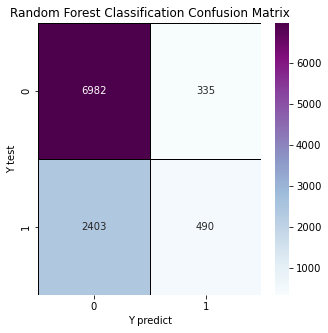

In [13]:
#the best model must get a good recall

getmatrix(Y_test,y_pred_xgb)

In [141]:
from sklearn.ensemble import RandomForestClassifier

# We define the model
rf = RandomForestClassifier(n_estimators=1000,random_state=9, bootstrap=True,n_jobs=-1)
rf.fit(X_train, Y_train)
y_pred_rf=rf.predict(X_test)

accuracy_score(Y_test,y_pred_rf),f1_score(Y_test,y_pred_rf,pos_label=1)

(0.7264446620959844, 0.13233923578751164)

In [168]:
from sklearn.naive_bayes import GaussianNB

# We define the model
nb = GaussianNB()

# We train model
nb.fit(X_train, Y_train)

# We predict target values
y_pred_nb = nb.predict(X_test)

accuracy_score(Y_test,y_pred_nb),f1_score(Y_test,y_pred_nb,pos_label=1)

(0.6672543258243552, 0.281038374717833)

In [184]:
from sklearn.neighbors import KNeighborsClassifier

kn=KNeighborsClassifier(n_neighbors=8)
kn.fit(X_train, Y_train)
y_pred_kn = kn.predict(X_test)

accuracy_score(Y_test,y_pred_kn),f1_score(Y_test,y_pred_kn,pos_label='Yes')

(0.7004244205027751, 0.13368580060422958)

In [163]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

vote = VotingClassifier(estimators=[
    ('log_clf', LogisticRegression()), 
    ('knn_clf', KNeighborsClassifier(n_neighbors = 6)),
    ('dt_clf', DecisionTreeClassifier(random_state=666)),
    ('rf_clf',RandomForestClassifier(n_estimators=10, bootstrap=True,random_state=9)),],
                             voting='soft')
vote.fit(X_train,Y_train)
y_pred_vote=vote.predict(X_test)

accuracy_score(Y_test,y_pred_vote),f1_score(Y_test,y_pred_vote,pos_label=1)

(0.6958537381651975, 0.2580439630455559)

In [47]:
collections.Counter(Y_test)

Counter({0: 7340, 1: 2870})

In [81]:
#save our pred and model

df_test['Churn']=y_pred_xgb
df_test.iloc[:,:2].to_csv(r'C:\Users\杜威\Desktop\机器学习\pred_1.9.csv')

import joblib
joblib.dump(xgb,r'C:\Users\杜威\Desktop\机器学习\pred_1.9.dat')

## some other work try to get better score (but loss)

In [14]:
from scipy.stats import skew  # for some statistics
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from mlxtend.regressor import StackingCVRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


kfolds = KFold(n_splits=5, shuffle=True, random_state=42)

alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

In [15]:
ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=alphas_alt, cv=kfolds))
lasso = make_pipeline(RobustScaler(), LassoCV(max_iter=10000, alphas=alphas2, random_state=42, cv=kfolds))
elasticnet = make_pipeline(RobustScaler(), ElasticNetCV(max_iter=10000, alphas=e_alphas, cv=kfolds, l1_ratio=e_l1ratio))                                
svr = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0003,))

In [16]:
gbr = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.05, max_depth=4, max_features='sqrt', min_samples_leaf=15, min_samples_split=10, loss='huber', random_state =42) 

In [17]:
lightgbm = LGBMRegressor(objective='regression', 
                                       num_leaves=4,
                                       learning_rate=0.05, 
                                       n_estimators=1000,
                                       max_bin=200, 
                                       bagging_fraction=0.75,
                                       bagging_freq=5, 
                                       bagging_seed=7,
                                       feature_fraction=0.2,
                                       feature_fraction_seed=7,
                                       verbose=-1,
                                       )

In [18]:
xgboost = XGBRegressor(learning_rate=0.05,n_estimators=1000,
                                     max_depth=3, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7, nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.00006)

In [28]:
stack_gen = StackingCVRegressor(regressors=(ridge, lasso, elasticnet, gbr, xgb, lightgbm),
                                meta_regressor=xgb,
                                use_features_in_secondary=True)

In [2]:
def getscore(clf):
    clf.fit(X_train, Y_train)
    y_pred_xgb_num=clf.predict(X_test)
    y_pred_xgb=np.array(y_pred_xgb_num>0.5,dtype=int)

    return (accuracy_score(Y_test,y_pred_xgb),f1_score(Y_test,y_pred_xgb,pos_label=1)),clf

In [29]:
score,clf=getscore(stack_gen)
score

[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_f

(0.7295788442703233, 0.27092685503036706)

In [103]:
lis=[ridge, lasso, elasticnet, gbr, xgboost, lightgbm]
for clf in lis:
    print(getscore(clf))

(0.7123408423114593, 0.04050963737340738)
(0.7124387855044074, 0.034845496383957925)
(0.7124387855044074, 0.034845496383957925)
(0.7251714005876592, 0.1771260997067449)
(0.7269343780607248, 0.22253206915783602)
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
(0.7219392752203722, 0.1588148148148148)
